# Project: Investigate a TMDB Dataset provided by UDACITY

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I have choosen TMDB database for the Data analysis which contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> 1. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
> 2. There are some odd characters in the ‘cast’ column. We can leave them as it is.
> 3. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> Questions:
> 1. What are the most and least profitable movies as we have budgets and revenue for the movies in the datasets?
> 2. What are the longest and shortest runtimes movies?
> 3. What is the average Runtime of all movies?
> 4. Which genres are most popular from year to year?
> 5. What kinds of properties are associated with films that have high revenues?



In [3]:
import pandas
import numpy
from matplotlib import pyplot as plt

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

moviesData = pandas.read_csv('tmdb-movies.csv')

moviesData.head(10) # Prints first 10 rows


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [5]:
moviesData.shape[0] # Prints number of entries or rows

10866

In [6]:
moviesData.shape[1] # Prints number of columns

21

In [7]:
moviesData.info() # Prints info about the csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
len(moviesData.groupby('imdb_id'))

10855

In [9]:
moviesData[moviesData.duplicated(['imdb_id'], keep=False)].groupby(('imdb_id')).min() # Duplicate Entry

,id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
imdb_id,,,,,,,,,,,,,,,,,,,,
tt0411951,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### Data Cleaning 

1. `imdb_id` is the must field for each row. 10 are missing them.
2. `1` Duplicate entry
3. We can remove the columns that are not required. `imdb_id`, `budget`, `revenue`, `homepage`, `tagline`, `keywords`, `overview`, `production_companies`, `vote_count`, `vote_average`. Ignore the vote
4. Found `0` in `revenue_adj` and `budget_adj` . (using these because they are in terms of 2010 dollars as mentioned in thr Inroduction)
5. Data type of `budget_adj` and `revenue_adj` as csv corresponds to string. 
6. Found `10843` not null `genres` which corresponds to `23` null or empty fields for `genres`



In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

moviesData.drop_duplicates(subset=['imdb_id'], keep='first', inplace=True) # Drop Duplicates

moviesData.dropna(subset=['imdb_id'], inplace=True) # Drop Missing Values
moviesData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [11]:
moviesData.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'], axis=1, inplace=True)


In [12]:
moviesData.head(10) # Prints first 10 rows


,id,popularity,original_title,cast,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,6/9/15,2015,1.609999e+08,7.854116e+08


In [13]:
updatedData = moviesData[moviesData['budget_adj'] > 0]
updatedMoviesData = updatedData[updatedData['revenue_adj'] > 0]

updatedMoviesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
id                3854 non-null int64
popularity        3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 361.3+ KB


In [14]:
updatedMoviesData.dropna(subset=['genres'], inplace=True)
updatedMoviesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 11 columns):
id                3854 non-null int64
popularity        3854 non-null float64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 361.3+ KB


/Users/parveenarora/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
updatedMoviesData.dtypes

id                  int64
popularity        float64
original_title     object
cast               object
director           object
runtime             int64
genres             object
release_date       object
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### What are the most and least profitable movies

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

updatedMoviesData.insert(11, 'profit', updatedMoviesData['revenue_adj'] - updatedMoviesData['budget_adj'])
highestProfitable = updatedMoviesData.loc[updatedMoviesData['profit'].idxmax()]
leastProfitable = updatedMoviesData.loc[updatedMoviesData['profit'].idxmin()]
print(highestProfitable)
print(leastProfitable)

id                                                               11
popularity                                                  12.0379
original_title                                            Star Wars
cast              Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                               George Lucas
runtime                                                         121
genres                             Adventure|Action|Science Fiction
release_date                                                3/20/77
release_year                                                   1977
budget_adj                                              3.95756e+07
revenue_adj                                             2.78971e+09
profit                                                  2.75014e+09
Name: 1329, dtype: object
id                                                            46528
popularity                                                  0.25054
original_title        

### What are the longest and shortest runtimes movies?

In [17]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

highestRuntime = updatedMoviesData.loc[updatedMoviesData['runtime'].idxmax()]
leastRuntime = updatedMoviesData.loc[updatedMoviesData['runtime'].idxmin()]
print(highestRuntime)
print("\n")
print(leastRuntime)

id                                                            43434
popularity                                                 0.534192
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
director                                            Olivier Assayas
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                                5/19/10
release_year                                                   2010
budget_adj                                                  1.8e+07
revenue_adj                                                  871279
profit                                                 -1.71287e+07
Name: 2107, dtype: object


id                                                            24914
popularity                                                 0.208637
original_title      

### What is the average runtimes of all movies?

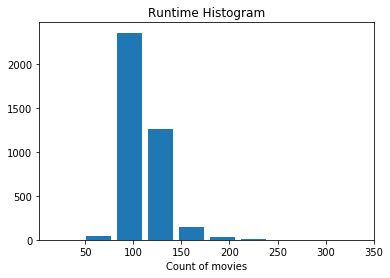

,id,popularity,runtime,release_year,budget_adj,revenue_adj,profit
count,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,109.220291,2001.261028,4.423999e+07,1.370647e+08,9.282470e+07
std,67222.527399,1.475162,19.922820,11.282575,4.480925e+07,2.161114e+08,1.940715e+08
min,5.000000,0.001117,15.000000,1960.000000,9.693980e-01,2.370705e+00,-4.139124e+08
25%,6073.500000,0.462368,95.000000,1995.000000,1.309053e+07,1.835735e+07,-1.504995e+06
50%,11321.500000,0.797511,106.000000,2004.000000,3.001611e+07,6.173068e+07,2.737064e+07
75%,38573.250000,1.368324,119.000000,2010.000000,6.061307e+07,1.632577e+08,1.074548e+08
max,417859.000000,32.985763,338.000000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [18]:
plt.hist(updatedMoviesData['runtime'], rwidth=0.8)
plt.title('Runtime Histogram')
plt.xlabel('Count of movies')
plt.show()

updatedMoviesData.describe()

> As shown in the histogram, we can see the average runtime lies between 90-110min approx. We can see the mean as well 109. 

### Which genres are most popular from year to year?

> We need to group movies for each year and find the one which is having the maximum popularity in that year and plot a histogram.

In [19]:
idx = updatedMoviesData.groupby(['release_year'], sort=True)['popularity'].transform(max) == updatedMoviesData['popularity']

genresData = updatedMoviesData[idx].sort_values('release_year',ascending=False)

genresData.loc[:, 'genres':'release_year']

,genres,release_date,release_year
0,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
629,Adventure|Drama|Science Fiction,11/5/14,2014
5422,Animation|Adventure|Family,11/27/13,2013
4361,Science Fiction|Action|Adventure,4/25/12,2012
3372,Action|Adventure|Science Fiction,7/22/11,2011
1919,Action|Thriller|Science Fiction|Mystery|Adventure,7/14/10,2010
1386,Action|Adventure|Fantasy|Science Fiction,12/10/09,2009
2875,Drama|Action|Crime|Thriller,7/16/08,2008
7387,Adventure|Fantasy|Action,5/19/07,2007
6554,Fantasy|Action|Science Fiction|Thriller,1/12/06,2006


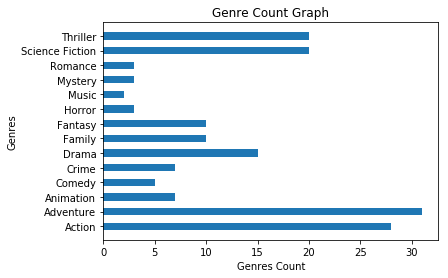

In [80]:
def get_genre_list(genres):
# Input: genres - list of genres
# Output: unique list of genres

    genrelist = []
    for genre in genres:

        g1 = str(genre)
        words = g1.split('|')
        genrelist = genrelist + words
    return numpy.unique(genrelist, return_counts=True)

unique, counts = get_genre_list(genresData['genres'])

ind = numpy.arange(len(unique))
p1 = plt.barh(ind,counts, 0.5)
plt.title('Genre Count Graph')
plt.ylabel('Genres')
plt.xlabel('Genres Count')
plt.yticks(ind,unique)

plt.show()



> Over the years, Adventure, Action, Science Fiction and Thriller has the maximum count which indicates their popularity over all the years. 

### What kinds of properties are associated with films that have high revenues?

> Properties which might affect the revenues for the films:

> 1. Popularity ?
> 2. Runtime ?
> 3. Budget ?

> We need to  find the correlation between revenue and these properties

### Popularity ?

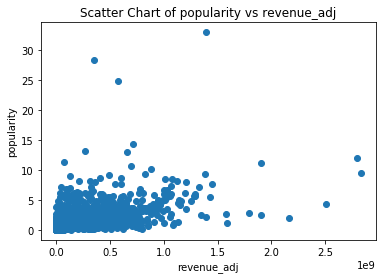

Correlation between Revenue and popularity 0.546959184617141


In [25]:
plt.scatter(updatedMoviesData['revenue_adj'], updatedMoviesData['popularity'])
plt.xlabel('revenue_adj')
plt.ylabel('popularity')
plt.title("Scatter Chart of popularity vs revenue_adj")
plt.show()

correlation = updatedMoviesData['revenue_adj'].corr(updatedMoviesData['popularity'])
print('Correlation between Revenue and popularity', correlation)

### Runtime ?

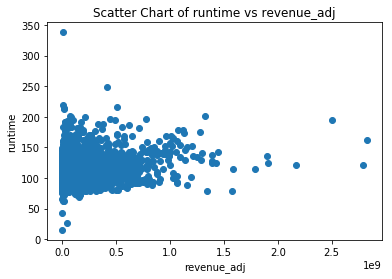

Correlation between Revenue and Runtime 0.280504777238597


In [24]:
plt.scatter(updatedMoviesData['revenue_adj'], updatedMoviesData['runtime'])
plt.xlabel('revenue_adj')
plt.ylabel('runtime')
plt.title("Scatter Chart of runtime vs revenue_adj")
plt.show()

correlation = updatedMoviesData['revenue_adj'].corr(updatedMoviesData['runtime'])
print('Correlation between Revenue and Runtime', correlation)

### Budget ?

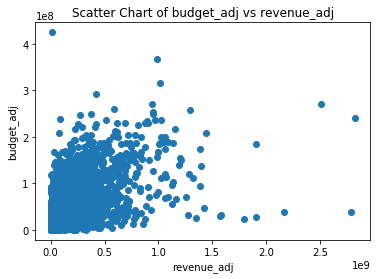

Correlation between Revenue and Budget 0.5704510195812402


In [23]:
plt.scatter(updatedMoviesData['revenue_adj'], updatedMoviesData['budget_adj'])
plt.xlabel('revenue_adj')
plt.ylabel('budget_adj')
plt.title("Scatter Chart of budget_adj vs revenue_adj")
plt.show()

correlation = updatedMoviesData['revenue_adj'].corr(updatedMoviesData['budget_adj'])
print('Correlation between Revenue and Budget', correlation)

> As we can see from the above graphs and correlation values. Budget and popularity have high correlation with revenue around 0.5 which corresponds to higher their values might increase the revenue. We can also see the correlation between Runtime and Revenue which is around 0.28 which means it has little positive effect towards higher revenue.

<a id='conclusions'></a>
## Conclusions

> As shown in the Runtime histogram, we can see the average runtime lies between 90-110min approx.

> Adventure, Science Fiction and Drama has the maximum count which indicates their popularity over all the years. 

>  Budget and popularity have high correlation with revenue around 0.5 which corresponds to higher their values might increase the revenue.

>  We can also see the correlation between Runtime and Revenue which is around 0.28 which means it has little positive effect towards higher revenue.


### Limitations

> We had quite a bit data set while analysing but because of insufficient data in genres/revenue/budget which had to remove those tuples and led us to a limited dataset.

> Analysing a limited dataset can affect the statistics.

> There are other factors that can affect the revenues like directors, cast etc but to quantify them statistically may not be possible.

> We assumed all the movies revenue and budget has same unit as it has not been mentioned.